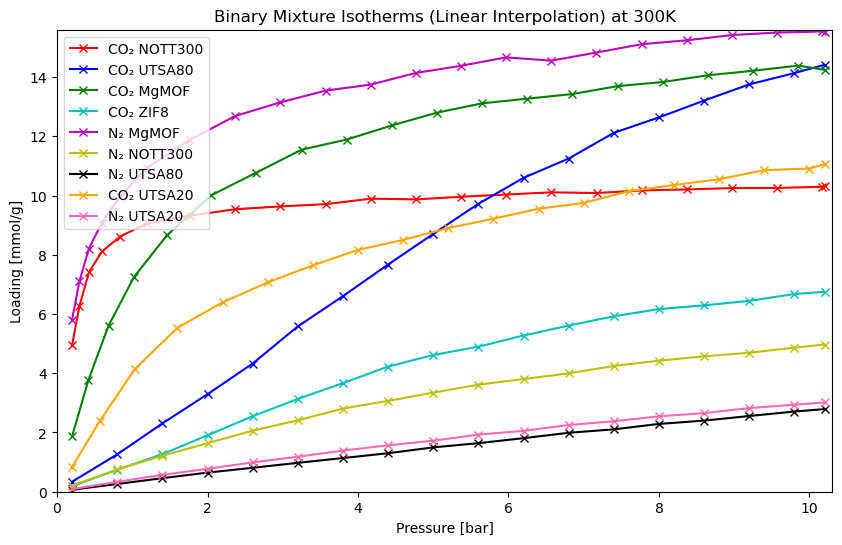

In [9]:
import pandas as pd
import pyiast
import matplotlib.pyplot as plt

# List of CSV filenames and corresponding colors
csv_files = [
    "project - co2 nott300.csv", "project - co2 utsa80.csv", "project - co2-mgmof.csv", 
    "project - co2-zif8.csv", "project - n2 mgmof.csv", "project - n2-nott300.csv", 
    "project - n2-utsa80.csv", "project - utsa20-co2.csv", "project - n2 utsa20.csv" 
]

# Custom labels for each isotherm
custom_labels = [
    "CO₂ NOTT300", "CO₂ UTSA80", "CO₂ MgMOF", "CO₂ ZIF8", 
    "N₂ MgMOF", "N₂ NOTT300", "N₂ UTSA80", "CO₂ UTSA20 ", "N₂ UTSA20"
]

# Colors for each file's plot
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', "#ff69b4"]

plt.figure(figsize=(10, 6))

# Iterate over the list of files, colors, and plot each isotherm
for i, (file, label) in enumerate(zip(csv_files, custom_labels)):
    # Load the CSV file
    df = pd.read_csv(file)
    
    # Extract the pressure and loading columns from the file
    pressure = df["pressure(bar)"]
    loading = df["loading_abs_avg(mol/kg)"]
    
    # Create an instance of InterpolatorIsotherm for each file
    isotherm = pyiast.InterpolatorIsotherm(df,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")
    
    # Get the interpolated loading values at the actual pressures in the file
    interpolated_loading = [isotherm.loading(p) for p in pressure]
    
    # Plot each isotherm with a unique color and custom label
    plt.plot(pressure, interpolated_loading, label=label, marker='x', color=colors[i])

# Customize plot
plt.title('Binary Mixture Isotherms (Linear Interpolation) at 300K')
plt.xlabel('Pressure [bar]')
plt.ylabel('Loading [mmol/g]')
plt.legend()
plt.grid(False)
plt.xlim(0, 10.3)  # Set x-limit based on the highest pressure in the data
plt.ylim(0, 15.6)  # Adjust y-limit based on your dataset range
plt.show()


In [10]:
# Define the pressure for selectivity calculation
sel_pressure = 1  
y_CO2 = 0.15  
y_N2 = 1 - y_CO2  

# Load the specific isotherms for CO₂ UTSA80 and N₂ UTSA80
df_co2_utsa80 = pd.read_csv("project - co2 utsa80.csv")
df_n2_utsa80 = pd.read_csv("project - n2-utsa80.csv")

# Create InterpolatorIsotherm instances for CO₂ UTSA80 and N₂ UTSA80
co2_utsa80_isotherm = pyiast.InterpolatorIsotherm(df_co2_utsa80,
                                                  loading_key="loading_abs_avg(mol/kg)",
                                                  pressure_key="pressure(bar)")
n2_utsa80_isotherm = pyiast.InterpolatorIsotherm(df_n2_utsa80,
                                                 loading_key="loading_abs_avg(mol/kg)",
                                                 pressure_key="pressure(bar)")

# Calculate loading for CO₂ and N₂ at the selectivity pressure
q_CO2 = co2_utsa80_isotherm.loading(sel_pressure) * y_CO2
q_N2 = n2_utsa80_isotherm.loading(sel_pressure) * y_N2

# Calculate selectivity
if q_N2 > 0:  # Avoid division by zero
    selectivity = (q_CO2 * y_N2) / (q_N2 * y_CO2)
else:
    selectivity = float('inf')  # Set to infinity if division by zero

# Output the selectivity result for CO₂ UTSA80 and N₂ UTSA80
print(f"Selectivity of CO₂ over N₂ at {sel_pressure} bar (UTSA80): {selectivity:.2f}")


Selectivity of CO₂ over N₂ at 1 bar (UTSA80): 4.93


In [20]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("project - co2 utsa80.csv")  # Replace with the correct file
df_n2 = pd.read_csv("project - n2-utsa80.csv")  # Replace with the correct file

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  # Total pressure (bar)
y_CO2 = 0.15  # Mole fraction of CO₂
y_N2 = 0.85   # Mole fraction of N₂

# Calculate the partial pressures
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
if q[1] > 0:  # Avoid division by zero
    selectivity = (q[0] * y_N2) / (q[1] * y_CO2)
else:
    selectivity = float('inf')  # Selectivity is infinity if denominator is 0

# Print the results
print(f"Loading at {total_pressure} bar for CO₂: {q[0]:.2f} mol/kg")
print(f"Loading at {total_pressure} bar for N₂: {q[1]:.2f} mol/kg")
print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar: {selectivity:.2f}")


Loading at 1 bar for CO₂: 0.25 mol/kg
Loading at 1 bar for N₂: 0.27 mol/kg
Selectivity of CO₂ over N₂ at 1 bar: 5.10


In [21]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("project - utsa20-co2.csv")  # Replace with the correct file
df_n2 = pd.read_csv("project - n2 utsa20.csv")  # Replace with the correct file

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  # Total pressure (bar)
y_CO2 = 0.15  # Mole fraction of CO₂
y_N2 = 0.85   # Mole fraction of N₂

# Calculate the partial pressures
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
if q[1] > 0:  # Avoid division by zero
    selectivity = (q[0] * y_N2) / (q[1] * y_CO2)
else:
    selectivity = float('inf')  # Selectivity is infinity if denominator is 0

# Print the results
print(f"Loading at {total_pressure} bar for CO₂: {q[0]:.2f} mol/kg")
print(f"Loading at {total_pressure} bar for N₂: {q[1]:.2f} mol/kg")
print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar: {selectivity:.2f}")


Loading at 1 bar for CO₂: 0.61 mol/kg
Loading at 1 bar for N₂: 0.34 mol/kg
Selectivity of CO₂ over N₂ at 1 bar: 10.21


In [23]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("project - co2 nott300.csv")  # Replace with the correct file
df_n2 = pd.read_csv("project - n2-nott300.csv")  # Replace with the correct file

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  # Total pressure (bar)
y_CO2 = 0.15  # Mole fraction of CO₂
y_N2 = 0.85   # Mole fraction of N₂

# Calculate the partial pressures
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
if q[1] > 0:  # Avoid division by zero
    selectivity = (q[0] * y_N2) / (q[1] * y_CO2)
else:
    selectivity = float('inf')  # Selectivity is infinity if denominator is 0

# Print the results
print(f"Loading at {total_pressure} bar for CO₂: {q[0]:.2f} mol/kg")
print(f"Loading at {total_pressure} bar for N₂: {q[1]:.2f} mol/kg")
print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar: {selectivity:.2f}")


Loading at 1 bar for CO₂: 3.58 mol/kg
Loading at 1 bar for N₂: 0.66 mol/kg
Selectivity of CO₂ over N₂ at 1 bar: 30.98


In [26]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("project - co2-mgmof.csv")  # Replace with the correct file
df_n2 = pd.read_csv("project - n2 mgmof.csv")  # Replace with the correct file

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  # Total pressure (bar)
y_CO2 = 0.15  # Mole fraction of CO₂
y_N2 = 0.85   # Mole fraction of N₂

# Calculate the partial pressures
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
if q[1] > 0:  # Avoid division by zero
    selectivity = (q[0] * y_N2) / (q[1] * y_CO2)
else:
    selectivity = float('inf')  # Selectivity is infinity if denominator is 0

# Print the results
print(f"Loading at {total_pressure} bar for CO₂: {q[0]:.2f} mol/kg")
print(f"Loading at {total_pressure} bar for N₂: {q[1]:.2f} mol/kg")
print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar: {selectivity:.2f}")


Loading at 1 bar for CO₂: 1.38 mol/kg
Loading at 1 bar for N₂: 0.27 mol/kg
Selectivity of CO₂ over N₂ at 1 bar: 29.45


In [15]:
import pandas as pd
import pyiast

# List of CO₂ CSV filenames
co2_files = [
    "project - co2 nott300.csv", "project - co2 utsa80.csv", 
    "project - co2-mgmof.csv", "project - co2-zif8.csv", 
    "project - utsa20-co2.csv"
]

# Initialize a dictionary to hold working capacity results for CO₂
working_capacity_results_co2 = {}

# Iterate over the CO₂ CSV files to calculate working capacity
for co2_file in co2_files:
    # Load the CSV file for CO₂
    df_co2 = pd.read_csv(co2_file)

    # Create InterpolatorIsotherm instance for CO₂
    co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                                loading_key="loading_abs_avg(mol/kg)",
                                                pressure_key="pressure(bar)")

    # Calculate loading for CO₂ at 0.2 bar and 1 bar
    q_CO2_0_2 = co2_isotherm.loading(0.2)
    q_CO2_1 = co2_isotherm.loading(1.0)

    # Calculate working capacity for CO₂
    wc_CO2 = q_CO2_1 - q_CO2_0_2

    # Store the results in the dictionary using the file name as the key
    working_capacity_results_co2[co2_file] = wc_CO2

# Output the working capacity results for CO₂ for all files
for file, wc in working_capacity_results_co2.items():
    print(f"Working Capacity of CO₂ at 1 bar - {file}: {wc:.4f} mol/kg")


Working Capacity of CO₂ at 1 bar - project - co2 nott300.csv: 0.5802 mol/kg
Working Capacity of CO₂ at 1 bar - project - co2 utsa80.csv: 0.1908 mol/kg
Working Capacity of CO₂ at 1 bar - project - co2-mgmof.csv: 0.7905 mol/kg
Working Capacity of CO₂ at 1 bar - project - co2-zif8.csv: 0.1102 mol/kg
Working Capacity of CO₂ at 1 bar - project - utsa20-co2.csv: 0.4775 mol/kg
